In [1]:
# This reads in csv files with signal and noise data, as out out
# by the Altair pipeline, and compares them (for bug-checking)

# Created 2019 November 5 by E.S.

In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# some constants for plotting

lambda_over_D = np.divide(4.05E-6,8.25)*206265.
lambda_over_Bcc = np.divide(4.05E-6,14.4)*206265.

In [3]:
no_planets_string = ("/Users/nyumbani/Downloads/pipeline_10_signal_to_noise/"+
                     "cubes/test_no_planets_191109_no_smoothing/"+
                     "test_no_planets_191109_no_smoothing_csv_file.csv")
#with_planets_string = ("/Users/nyumbani/Downloads/pipeline_10_signal_to_noise/"+
#                       "cubes/test_with_planets_191108/test_with_planets_csv_file.csv")
with_planets_string = ("/Users/nyumbani/Downloads/pipeline_10_signal_to_noise/"+
                       "cubes/test_with_planets_191109_no_smoothing/"+
                       "test_191109_with_planets_no_smoothing_csv_file.csv")

In [4]:
df_no_planets = pd.read_csv(no_planets_string)
df_with_planets = pd.read_csv(with_planets_string)

In [5]:
#host_ampl = df_no_planets["host_ampl"]
host_ampl = 4.4497252e+09 # kludge if the image has not been smoothed

In [6]:
# sort by radius

df_no_planets = df_no_planets.sort_values(by="rad_asec").reset_index()
df_with_planets = df_with_planets.sort_values(by="rad_asec").reset_index()

In [7]:
df_with_planets

,index,Unnamed: 0,angle_deg,rad_asec,ampl_linear_norm,host_ampl,signal,noise,s2n
0,1,0,0.0,0.05,0.001,1.165688e+09,1.135344e+08,4.028336e+07,2.818394
1,5,0,0.0,0.10,0.001,1.165688e+09,7.709142e+07,9.380391e+06,8.218360
2,0,0,0.0,0.20,0.001,1.165688e+09,4.444240e+06,4.698145e+05,9.459565
3,6,0,0.0,0.25,0.001,1.165688e+09,3.900070e+06,3.140328e+05,12.419306
4,4,0,0.0,0.30,0.001,1.165688e+09,2.812640e+06,1.851422e+05,15.191787
5,2,0,0.0,0.35,0.001,1.165688e+09,2.894022e+06,2.110178e+05,13.714586
6,3,0,0.0,0.40,0.001,1.165688e+09,2.594054e+06,1.700946e+05,15.250653


In [8]:
df_no_planets

,index,Unnamed: 0,angle_deg,rad_asec,ampl_linear_norm,host_ampl,signal,noise,s2n
0,1,0,0.0,0.05,0.001,1.165688e+09,1.128691e+08,4.029824e+07,2.800845
1,2,0,0.0,0.10,0.001,1.165688e+09,7.686184e+07,9.386587e+06,8.188475
2,5,0,0.0,0.20,0.001,1.165688e+09,2.880789e+06,3.846399e+05,7.489573
3,6,0,0.0,0.25,0.001,1.165688e+09,4.085801e+05,1.726921e+05,2.365946
4,0,0,0.0,0.30,0.001,1.165688e+09,2.561020e+05,6.890201e+04,3.716902
5,4,0,0.0,0.35,0.001,1.165688e+09,5.691450e+04,4.868086e+04,1.169135
6,3,0,0.0,0.40,0.001,1.165688e+09,5.251195e+04,2.133822e+04,2.460934


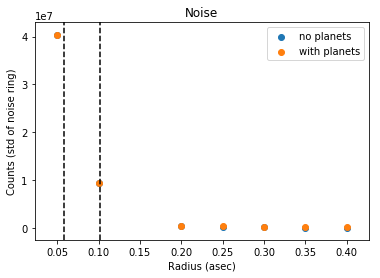

In [14]:
plt.scatter(df_no_planets["rad_asec"],df_no_planets["noise"],label="no planets")
plt.scatter(df_with_planets["rad_asec"],df_with_planets["noise"],label="with planets")
plt.axvline(x=lambda_over_D, linestyle="--", color="k")
plt.axvline(x=lambda_over_Bcc, linestyle="--", color="k")
plt.xlabel("Radius (asec)")
plt.ylabel("Counts (std of noise ring)")
plt.legend()
plt.title("Noise")
#plt.savefig("noise__191109.pdf")
plt.show()

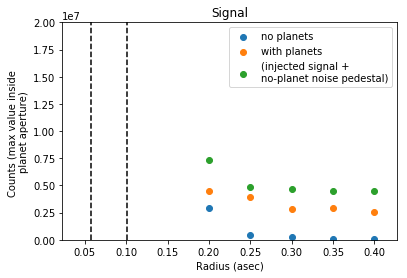

In [15]:
plt.scatter(df_no_planets["rad_asec"],df_no_planets["signal"],label="no planets")
plt.scatter(df_with_planets["rad_asec"],df_with_planets["signal"],label="with planets")

# plot expected signal, given the noise in no-planet frames and amplitude of the fake
plt.scatter(df_no_planets["rad_asec"],np.add(df_no_planets["signal"],0.001*host_ampl),
            label="(injected signal + \nno-planet noise pedestal)")
plt.axvline(x=lambda_over_D, linestyle="--", color="k")
plt.axvline(x=lambda_over_Bcc, linestyle="--", color="k")
plt.xlabel("Radius (asec)")
plt.ylabel("Counts (max value inside \nplanet aperture)")
plt.ylim(np.multiply(1e8,[0,0.2]))
plt.legend()
plt.title("Signal")
#plt.savefig("signal_191109.pdf")
plt.show()

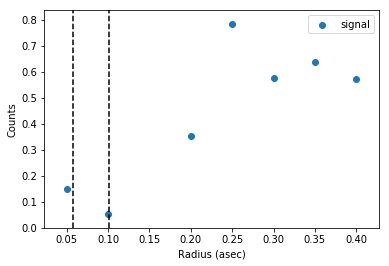

In [12]:
plt.clf()

signal_with_minus_signal_without = np.subtract(df_with_planets["signal"],
                                               df_no_planets["signal"])

signal_expected_above_noise = np.subtract(np.add(df_no_planets["signal"],0.001*host_ampl),
                                          df_no_planets["signal"])

throughput = np.divide(signal_with_minus_signal_without,signal_expected_above_noise)

# plot expected signal, given the noise in no-planet frames and amplitude of the fake
plt.scatter(df_no_planets["rad_asec"],throughput)
plt.axvline(x=lambda_over_D, linestyle="--", color="k")
plt.axvline(x=lambda_over_Bcc, linestyle="--", color="k")
plt.xlabel("Radius (asec)")
plt.ylabel("Counts")
plt.legend()
plt.title("Throughput (no smoothing)")
#plt.savefig("throughput_191109.pdf")
#plt.show()

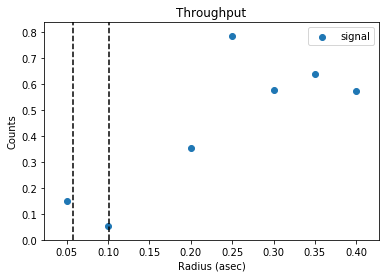

In [13]:
plt.clf()

signal_with_minus_signal_without = np.subtract(df_with_planets["signal"],
                                               df_no_planets["signal"])

signal_expected_above_noise = np.subtract(np.add(df_no_planets["signal"],0.001*host_ampl),
                                          df_no_planets["signal"])

throughput = np.divide(signal_with_minus_signal_without,signal_expected_above_noise)

# plot expected signal, given the noise in no-planet frames and amplitude of the fake
plt.scatter(df_no_planets["rad_asec"],throughput)
plt.axvline(x=lambda_over_D, linestyle="--", color="k")
plt.axvline(x=lambda_over_Bcc, linestyle="--", color="k")
plt.xlabel("Radius (asec)")
plt.ylabel("Counts")
plt.legend()
plt.title("Throughput")
plt.savefig("throughput_191109_no_smoothing.pdf")
#plt.show()

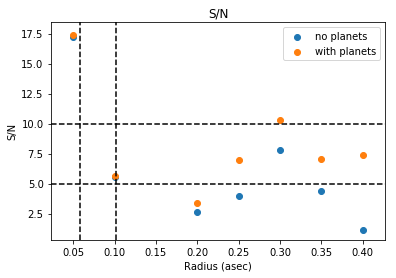

In [41]:
plt.scatter(df_no_planets["rad_asec"],df_no_planets["s2n"],label="no planets")
plt.scatter(df_with_planets["rad_asec"],df_with_planets["s2n"],label="with planets")
plt.axvline(x=lambda_over_D, linestyle="--", color="k")
plt.axvline(x=lambda_over_Bcc, linestyle="--", color="k")
plt.axhline(y=5, linestyle="--", color="k")
plt.axhline(y=10, linestyle="--", color="k")
plt.xlabel("Radius (asec)")
plt.ylabel("S/N")
plt.legend()
plt.title("S/N")
#plt.savefig("sn_191109.pdf")
plt.show()

In [ ]:
# check for consistency with notebook make_crude_contrast_curve.ipynb

# logic to convert S/N values from one notebook to magnitude of a 5sigma detection:
#   1. For an N S/N detection, find A = 5*(abs_ampl_fake/N). This is the fake companion 
#      amplitude needed for a 5sigma detection.
#   2. Find contrast corresponding to 5sigma: C = A/H, where H is host star amplitude.
#   3. Convert to mags

In [50]:
# frames with no planets

# Step 1 (this is actually the same as 5*noise)
df_no_planets["A_for_5sig"] = 5*np.divide(df_no_planets["signal"],df_no_planets["s2n"])

# Step 2
df_no_planets["C"] = np.divide(df_no_planets["A_for_5sig"],host_ampl)

# Step 3
df_no_planets["5sig_mag"] = -2.5*np.log10(df_no_planets["C"])

In [56]:
# frames with planets (method 1)

# Step 1 (this is actually the same as 5*noise)
df_with_planets["A_for_5sig"] = 5*np.divide(df_with_planets["signal"],df_with_planets["s2n"])

# Step 2
df_with_planets["C"] = np.divide(df_with_planets["A_for_5sig"],host_ampl)

# Step 3
df_with_planets["5sig_mag"] = -2.5*np.log10(df_with_planets["C"])

In [63]:
# frames with planets (method 2)

# Step 1 (this is actually the same as 5*noise)
df_with_planets["A_for_5sig"] = 5*df_with_planets["noise"]

# Step 2
df_with_planets["C"] = np.divide(df_with_planets["A_for_5sig"],host_ampl)

# Step 3
df_with_planets["5sig_mag"] = -2.5*np.log10(df_with_planets["C"])

In [59]:
df_no_planets

,index,Unnamed: 0,angle_deg,rad_asec,ampl_linear_norm,host_ampl,signal,noise,s2n,A_for_5sig,C,5sig_mag
0,5,0,0.0,0.05,0.001,1.165688e+09,5.178841e+06,300857.558491,17.213599,1.504288e+06,0.001290,7.223128
1,0,0,0.0,0.10,0.001,1.165688e+09,4.556315e+06,826573.682174,5.512291,4.132868e+06,0.003545,6.125827
2,2,0,0.0,0.20,0.001,1.165688e+09,1.707543e+06,659080.849692,2.590794,3.295404e+06,0.002827,6.371684
3,3,0,0.0,0.25,0.001,1.165688e+09,6.058389e+05,154008.544893,3.933800,7.700427e+05,0.000661,7.950169
4,6,0,0.0,0.30,0.001,1.165688e+09,1.791598e+05,23087.748428,7.759952,1.154387e+05,0.000099,10.010577
5,1,0,0.0,0.35,0.001,1.165688e+09,3.902098e+04,8899.542810,4.384605,4.449771e+04,0.000038,11.045611
6,4,0,0.0,0.40,0.001,1.165688e+09,7.620514e+03,6619.425975,1.151235,3.309713e+04,0.000028,11.366980


In [60]:
df_with_planets

,index,Unnamed: 0,angle_deg,rad_asec,ampl_linear_norm,host_ampl,signal,noise,s2n,A_for_5sig,C,5sig_mag
0,5,0,0.0,0.05,0.001,1.165688e+09,5.534643e+06,318712.027316,17.365656,1.593560e+06,0.001367,7.160534
1,2,0,0.0,0.10,0.001,1.165688e+09,4.834646e+06,859652.889286,5.623951,4.298264e+06,0.003687,6.083223
2,6,0,0.0,0.20,0.001,1.165688e+09,2.280172e+06,673178.849548,3.387171,3.365894e+06,0.002887,6.348704
3,1,0,0.0,0.25,0.001,1.165688e+09,1.366247e+06,195529.685267,6.987413,9.776484e+05,0.000839,7.690999
4,4,0,0.0,0.30,0.001,1.165688e+09,7.226843e+05,70062.539411,10.314846,3.503127e+05,0.000301,8.805316
5,3,0,0.0,0.35,0.001,1.165688e+09,5.122853e+05,72503.949666,7.065620,3.625197e+05,0.000311,8.768126
6,0,0,0.0,0.40,0.001,1.165688e+09,5.038699e+05,68206.031754,7.387469,3.410302e+05,0.000293,8.834474


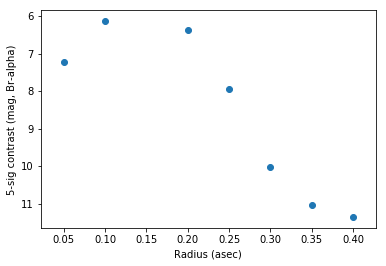

In [58]:
plt.scatter(df_no_planets["rad_asec"],df_no_planets["5sig_mag"])
plt.xlabel("Radius (asec)")
plt.ylabel("5-sig contrast (mag, Br-alpha)")
plt.gca().invert_yaxis()
plt.show()
#plt.savefig("contrast_curve_compare_adi_csv_files_with_planets.pdf")

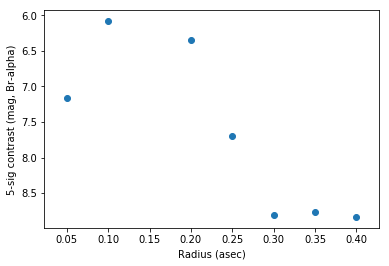

In [62]:
plt.scatter(df_with_planets["rad_asec"],df_with_planets["5sig_mag"])
plt.xlabel("Radius (asec)")
plt.ylabel("5-sig contrast (mag, Br-alpha)")
plt.gca().invert_yaxis()
plt.show()
#plt.savefig("contrast_curve_compare_adi_csv_files_with_planets.pdf")

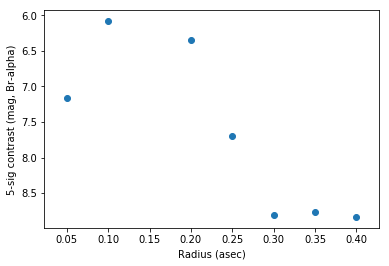

In [64]:
plt.scatter(df_with_planets["rad_asec"],df_with_planets["5sig_mag"])
plt.xlabel("Radius (asec)")
plt.ylabel("5-sig contrast (mag, Br-alpha)")
plt.gca().invert_yaxis()
plt.show()
#plt.savefig("contrast_curve_compare_adi_csv_files_with_planets.pdf")